# Oasis Infobyte : Data Science Internship

### Task 4 : Email spam detection with machine learning
### Name of Intern : Shivthare Ankita Pradip
### Batch : March P-2 OIB-SIP

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Loading the dataset

In [2]:
df=pd.read_csv("C:/Users/ankit/Downloads/spam.csv",encoding="latin1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [4]:
df.count()

v1            5572
v2            5572
Unnamed: 2      50
Unnamed: 3      12
Unnamed: 4       6
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.shape

(5572, 5)

## Step 3: Data Preprocessing

In [8]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [9]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
df.shape

(5572, 2)

In [14]:
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.rename(columns={'v1':'Target','v2':'Mail'},inplace=True)
df.head(5)

,Target,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
from sklearn.preprocessing import LabelEncoder
E=LabelEncoder()

In [19]:
df['Target']=E.fit_transform(df['Target'])

In [20]:
df.head()

,Target,Mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Step 4: Exploratory Data Analysis

<AxesSubplot:xlabel='Target', ylabel='count'>

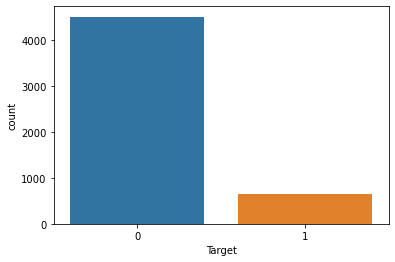

In [21]:
sns.countplot(x=df["Target"])

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

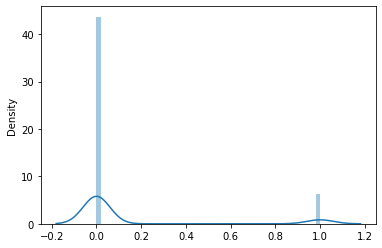

In [22]:
sns.distplot(x=df["Target"])

## Step 5: To Train Machine Learning Model

In [23]:
# using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
T=TfidfVectorizer(encoding='latin-1',stop_words='english',analyzer='word',lowercase=True,smooth_idf=True)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
# Spliting the data
x=df['Mail']
y=df['Target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [26]:
f_train=T.fit_transform(x_train)
f_test=T.transform(x_test)

## Step 6: Model Building

### Logistic Regression

In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(f_train,y_train)

LogisticRegression()

In [28]:
y_pred=LR.predict(f_test)

In [29]:
from sklearn import metrics
print(confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, LR.predict(f_test)))

[[1338    3]
 [  81  129]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1341
           1       0.98      0.61      0.75       210

    accuracy                           0.95      1551
   macro avg       0.96      0.81      0.86      1551
weighted avg       0.95      0.95      0.94      1551



In [30]:
print("Accuracy of model:",accuracy_score(y_test,y_pred))

Accuracy of model: 0.9458413926499033


#### Hence the Logistic Regression model has 94% accuracy for detection of email spam

### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
D=DecisionTreeClassifier(random_state=50)
D.fit(f_train,y_train)

DecisionTreeClassifier(random_state=50)

In [32]:
y_pred1=D.predict(f_test)

In [33]:
print(confusion_matrix(y_test,y_pred1))
print(metrics.classification_report(y_test, y_pred1))

[[1325   16]
 [  53  157]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.91      0.75      0.82       210

    accuracy                           0.96      1551
   macro avg       0.93      0.87      0.90      1551
weighted avg       0.95      0.96      0.95      1551



In [34]:
print("Accuracy of model:",accuracy_score(y_test,y_pred1))

Accuracy of model: 0.9555125725338491


#### Hence the decision tree classifier detect the email spam with 95% accuracy

# Thank You!!